<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA** <br>
**TÓPICOS EN APRENDIZAJE DE MÁQUINAS** <br>
**Taller 2** <br><br>

**Parte 2**

***Preparación del ambiente***


In [64]:
#Se cargan los paquetes necesarios.

#! pip install imblearn
#! pip install statsmodels

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
from aequitas.plotting import Plot

# modelo de Dession tree

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# modelo de ramdom forest 

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.calibration import CalibrationDisplay


In [65]:
#Se importa la base de datos.
Creditos = pd.read_csv("credit_card.csv", delimiter= ",")
Creditos = Creditos.drop(Creditos.columns[[0]], axis = 1) #Esta variable es el identificador, pero Python ya pone uno.
print(Creditos.shape)
Creditos.head()

(1319, 14)


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,sex,race
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,Male,White
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,Male,White
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,Male,White
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,Male,White
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,Male,Other


***Punto 1***

Entrenar un modelo que permita predecir la probabilidad que la tarjeta de crédito sea aprobada utilizando todas las variables.

In [66]:
#Se crean variables dummies para la categórica de Sexo y raza.
Creditos = pd.get_dummies(Creditos)
Creditos.head()

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_no,owner_yes,selfemp_no,selfemp_yes,sex_Female,sex_Male,race_Black,race_Other,race_White
0,1,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,0,1,1,0,0,1,0,0,1
1,1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,1,0,0,1,0,0,1
2,1,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,0,1,1,0,0,1,0,0,1
3,1,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,1,0,0,1,0,0,1
4,1,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,0,1,1,0,0,1,0,1,0


### Exploración de los datos

In [67]:
Creditos.shape

(1319, 19)

In [68]:
Creditos['card'].value_counts()

1    1023
0     296
Name: card, dtype: int64

In [69]:
Creditos['expenditure'].value_counts()

0.000000      317
4.583333        9
8.333333        8
7.083333        5
37.583330       2
             ... 
22.462500       1
294.580000      1
10.290830       1
632.080800      1
344.157500      1
Name: expenditure, Length: 981, dtype: int64

In [70]:
Creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   dependents   1319 non-null   int64  
 7   months       1319 non-null   int64  
 8   majorcards   1319 non-null   int64  
 9   active       1319 non-null   int64  
 10  owner_no     1319 non-null   uint8  
 11  owner_yes    1319 non-null   uint8  
 12  selfemp_no   1319 non-null   uint8  
 13  selfemp_yes  1319 non-null   uint8  
 14  sex_Female   1319 non-null   uint8  
 15  sex_Male     1319 non-null   uint8  
 16  race_Black   1319 non-null   uint8  
 17  race_Other   1319 non-null   uint8  
 18  race_White   1319 non-null   uint8  
dtypes: flo

<function matplotlib.pyplot.show(close=None, block=None)>

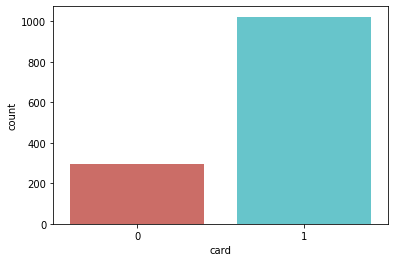

In [71]:
sns.countplot(x='card', data= Creditos, palette='hls')
plt.show
# clases no balanceadas
# modelos entrenados en conjuntos de datos no balanceados a menudo tienen malos resultados cuando tienen que generalizar (predecir una clase o clasificar observaciones no vistas).

In [72]:
Creditos.groupby('card').mean()

# COMENTARIOS
# En promedio se observa que se otorgan mas tarjetas de credito a ->
# aquellos con menos reportes negativos
# la edad no es relevante pero cerca a los 33,2 años 
# los de mayores ingresos (no mucha diferencia entre los grupos de ingreso) 
# personas con menos dependientes 
# con mayor gasto en tarjetas de credito 
# es indiferente a los meses de residecia en un lugar
# no es tan relevante, pero se otorgan mas a antiguos dueños de tarjetas
# con mayores cuentas de tarjetas de credito
# dueños de propiedades (colaterales)
# empelados dependientes
# hombres mas que a mujeres 
# blancos mas que a "otras razas" y estos a su vez mas que a los negros 

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_no,owner_yes,selfemp_no,selfemp_yes,sex_Female,sex_Male,race_Black,race_Other,race_White
card,,,,,,,,,,,,,,,,,,
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.695946,0.304054,0.905405,0.094595,0.699324,0.300676,0.621622,0.199324,0.179054
1,0.129032,33.216031,3.451273,0.088482,238.602421,0.969697,55.258065,0.839687,7.269795,0.520039,0.479961,0.938416,0.061584,0.304008,0.695992,0.167155,0.313783,0.519062


### Se separa la muestra en entrenamiento y prueba #####################

In [73]:
#Se separa la muestra en entrenamiento y prueba.
x_train, x_test, y_train, y_test = train_test_split(Creditos.drop(columns=["card"]), Creditos.card, 
                                                                  test_size = 0.3, random_state=1234)

###### SE EVALUAN 3 MODELOS PARA ELEGIR EL DE MEJOR AJUSTE ##########################

####### MODELO LOGÍSTICO #######

In [74]:
#Se ajustan un modelo logístico para la clasificación
modelo_logistico = LogisticRegression(solver='liblinear', random_state=12345).fit(x_train, y_train)
print(modelo_logistico.coef_, modelo_logistico.intercept_)

[[-1.48625389e+00  8.93444975e-04 -2.26141760e-01  9.25500095e-05
   1.52910936e+00 -6.44278804e-01 -2.88114978e-03  6.60768019e-02
   8.68223860e-02 -3.87613932e-01  6.58489170e-02 -5.54866872e-01
   2.33101857e-01 -5.83759004e-01  2.61993989e-01 -1.13534356e+00
  -7.05064615e-01  1.51864316e+00]] [-0.32176502]


In [75]:
#Primero la matriz de confusión para un primer vistazo del accuracy del modelo.
Y_predicho = modelo_logistico.predict(x_test)
print(metrics.confusion_matrix(y_test, Y_predicho))

#86 Verdaderos negativos, 1 falsos negativos, 5 falsos positivos y 304 verdaderos positivos.

[[ 86   1]
 [  5 304]]


In [76]:
### Acurracy test ###

# el accuracy representa el porcentaje de predicciones correctas frente al total. Por tanto, 
# es el cociente entre los casos bien clasificados por el modelo (verdaderos positivos y verdaderos negativos, es decir, 
# los valores en la diagonal de la matriz de confusión), y la suma de todos los casos.

# en este caso el accuracy es 98%, lo que implica que el modelo realiza un prediccion correcta sobre si se le otorga o no una tarjeta de credito el 98% de las veces 

print("Accuracy:", metrics.accuracy_score(y_test, Y_predicho))

Accuracy: 0.9848484848484849


####### MODELO DECISION TREE #######

In [77]:
modelo_dt = DecisionTreeClassifier().fit(x_train, y_train)
Y_predicho_dt = modelo_dt.predict(x_test)
print(metrics.confusion_matrix(y_test, Y_predicho_dt))

[[ 84   3]
 [  5 304]]


In [78]:
### Acurracy test ###

print("Accuracy:", metrics.accuracy_score(y_test, Y_predicho_dt))

Accuracy: 0.9797979797979798


####### MODELO RANDOM FOREST #######

In [79]:
modelo_rf = RandomForestClassifier().fit(x_train, y_train)
Y_predicho_rf = modelo_rf.predict(x_test)
print(metrics.confusion_matrix(y_test, Y_predicho_rf))

[[ 87   0]
 [  5 304]]


In [80]:
### Acurracy test ###

print("Accuracy:", metrics.accuracy_score(y_test, Y_predicho_rf))

Accuracy: 0.9873737373737373


*** Se selecciona el modelo de logistic regresion, dado a que segun el accuracy test, este modelo es mejor en la predicción comparado con el decision tree y es indiferente comparandolo al random forest, respecto a este ultimo, se sigue prefiriendo logistic regresion dado que este modelo provee predicciones mejor calibradas bajo un modelo probabilístico 

Según lo anterior los siguientes puntos se desarrollan solo con el modelo de logistic regresion 


***Punto 2***

Tomar el punto de corte óptimo de la curva ROC para categorizar las predicciones.

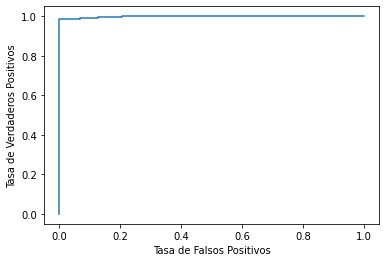

In [81]:
#Para la curva ROC, se obtienen las probabilidades de obtener la tarjeta (1) y la probabilidad de no obtener una tarjeta (0).
Y_proba_predicho = modelo_logistico.predict_proba(x_test) #La primera fila es Pr(y = 1) y la segunda 1 - Pr(y = 1).
#print(Y_proba_predicho)

#Ahora sí, la curva:
tfp, tvp, treshold = metrics.roc_curve(y_test, Y_proba_predicho[:,1])

plt.plot(tfp, tvp)
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlabel('Tasa de Falsos Positivos')
plt.show()

In [82]:
#Punto óptimo de corte
Optimo = treshold[np.argmax(tvp - tfp)]
print(Optimo)

#se recatogorizan las predicciones con respecto al óptimo de la curva ROC.
y_pred_optimo = np.where(Y_proba_predicho[::,0] < Optimo, 1, 0)


0.98389845123095


In [83]:
print("Optimo ROC", metrics.confusion_matrix(y_test, y_pred_optimo))
print("Logistico", metrics.confusion_matrix(y_test, Y_predicho))

# al revisar las matrices de confusión se observa que el modelo que adapta las predicciones al punto optimo de la curva ROC tiene mas problemas en la 
# en la prediccion de los verdaderos negativos respecto al modelo logistico por default

Optimo ROC [[ 47  40]
 [  0 309]]
Logistico [[ 86   1]
 [  5 304]]


***Punto 3***

Determinar si su modelo tiene sesgo con respecto a las variables de sexo y raza.

In [84]:
#Los valores únicos de las variables.
Creditos_aux  = pd.read_csv("credit_card.csv", delimiter= ",")
print(Creditos_aux.sex.unique())
print(Creditos_aux.race.unique())
#Sexo son solo dos (Male y Female), razas hay Black, White y Other.

['Male' 'Female']
['White' 'Other' 'Black']


¿Cómo se distribuye la aceptación para las tarjetas de crédito?

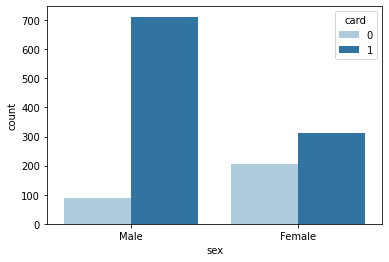

In [85]:
#Por sexo
gender_palette = sns.color_palette("Paired")
by_gender = sns.countplot(x = "sex", hue = "card", 
                          data = Creditos_aux[Creditos_aux.sex.isin(["Male", "Female"])],
                          palette= gender_palette)

#Relativo al número de tarjetas aceptadas, las mujeres les rechazan más aplicaciones que a los hombres.

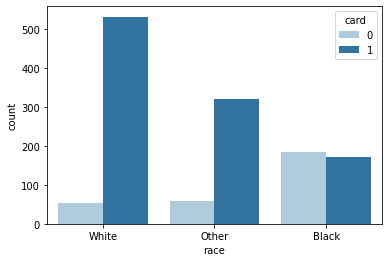

In [86]:
#Por raza.
by_race = sns.countplot(x = "race", hue = "card", 
                          data = Creditos_aux[Creditos_aux.race.isin(["White", "Black", "Other"])],
                          palette= gender_palette)

#Relativo al número de tarjetas aceptadas, a los blancos les rechazan muchas menos aplicaciones. En contraste, para las personas
#negras les rechazan más solicitudes de las que les aceptan.

In [87]:
#Se concatena en una sola base los datos de prueba y las predicciones.
aux = pd.DataFrame({"y_test": y_test, "y_predicho": y_pred_optimo})

#Para usar get_crosstab() hago lo siguiente.
Resultados = pd.merge(aux, Creditos_aux[["sex", "race"]], left_index=True, right_index=True)

#Cambio el nombre de las variables.
Resultados.columns = ["score", "label_value", 'sex', 'race']
Resultados

,score,label_value,sex,race
277,1,1,Female,White
504,1,1,Male,White
1253,0,1,Male,White
989,1,1,Male,Other
1255,1,1,Male,Other
...,...,...,...,...
1075,1,1,Male,Other
1112,1,1,Male,Other
789,1,1,Male,Other
29,1,1,Female,Other


In [88]:
#Se calculan distintas métricas del modelo logístico por sexo y raza.
g = Group()
xtab, categories = g.get_crosstabs(Resultados)
xtab

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,309,sex,Female,0.765217,1.0,0.428571,0.0,0.0,...,0.582781,0,27,36,88,115,36,151,396,0.761589
1,0,binary 0/1,309,sex,Male,0.944444,1.0,0.541667,0.0,0.0,...,0.902041,0,13,11,221,234,11,245,396,0.955102
2,0,binary 0/1,309,race,Black,0.760000,1.0,0.367347,0.0,0.0,...,0.537736,0,18,31,57,75,31,106,396,0.707547
3,0,binary 0/1,309,race,Other,0.903846,1.0,0.434783,0.0,0.0,...,0.803419,0,10,13,94,104,13,117,396,0.888889
4,0,binary 0/1,309,race,White,0.929412,1.0,0.800000,0.0,0.0,...,0.913295,0,12,3,158,170,3,173,396,0.982659


<AxesSubplot:title={'center':'PREV (Model 0)'}, xlabel='Absolute Metric Magnitude'>

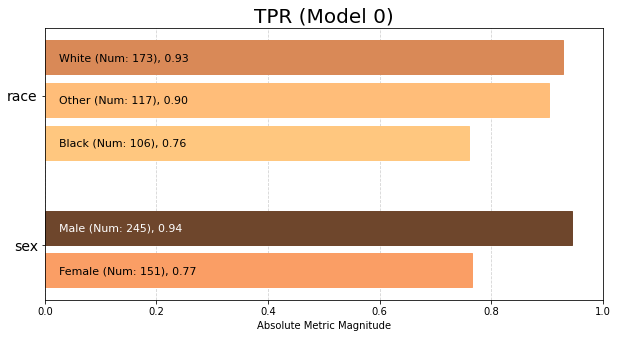

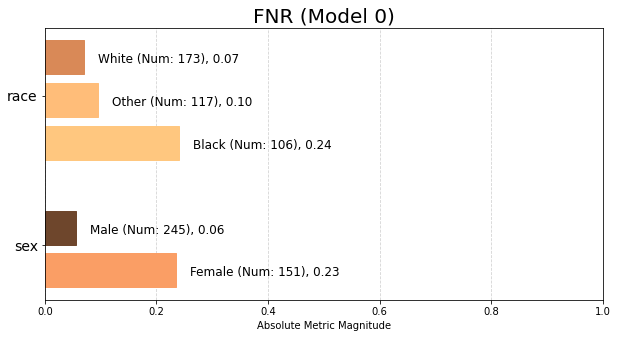

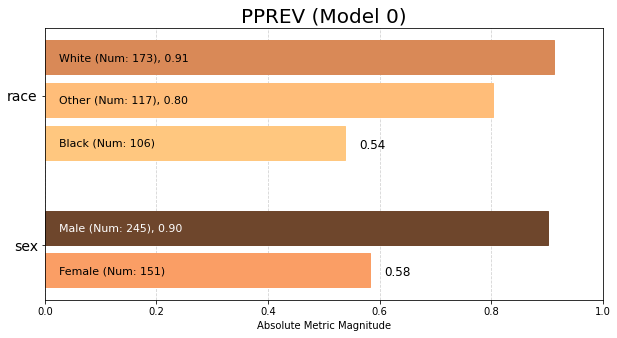

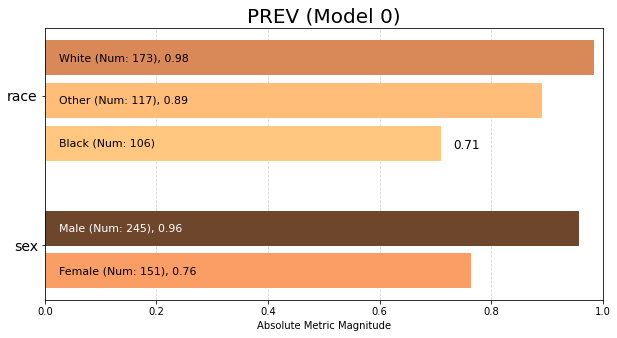

In [89]:
#De forma visual.
aqp = Plot()
aqp.plot_group_metric(xtab, 'tpr')
aqp.plot_group_metric(xtab, 'fnr')
aqp.plot_group_metric(xtab, 'pprev')
aqp.plot_group_metric(xtab, 'prev')

### COMENTARIOS SOBRE LA DISCRIMINACIÓN EN LAS VARIABLES DE SEXO Y RAZA 

*Relativo al número de tarjetas aceptadas, las mujeres les rechazan más aplicaciones que a los hombres.

*Relativo al número de tarjetas aceptadas, a los blancos les rechazan muchas menos aplicaciones. En contraste, para las personas
negras les rechazan más solicitudes de las que les aceptan.

* Al verificar el True Positive Rate (tpr) se observa una mayor favorabilidad de clasificar positivamente a los hombres blancos como mas aptos para obtener una tarjeta de crédito, respecto a las mujeres y las razas distintas.
De forma similar, al verificar el Predicted Positive Ratio (ppr y pprev), se concluye que el modelo predice como proporción de verdaderos positivos mas a los hombres, con preferencia por la raza blanca, seguidos por otras razas, finalizando con la raza negra. Por lo que se mantiene el sesgo por las mujeres y la raza negra. Finalmente, al comparar la True Negative Rate (tnr) no se observa algún sesgo para las razas o los sexos.

* Al observar la disparidad entre sexos y razas para el True Positive Rate (tpr) es clara una desventaja contra la raza negra y el sexo femenino para ser pronosticada de forma positiva, así mismo, al comparar la disparidad entre sexos y razas para el False Negative Rate (tpr) se observa que la raza negra y el sexo femenino tienen mas tendencia a ser clasificados falsamente como negativos, en proporción a la raza blanca y el sexo masculino. 




***Punto 4***

Retomar las predicciones del punto 1, hacer una calibración de su modelo con Platt scaling y otra con transformación isotónica. (Revisen la clase sklearn.calibration.CalibratedClassifierCV)

In [90]:
#Paquetes necesarios.
from sklearn.calibration import CalibratedClassifierCV

Primero Platt Scalling

In [91]:

modelo_logit_aux = LogisticRegression(solver='liblinear', random_state=12345)
modelo_logit_platt = CalibratedClassifierCV(modelo_logit_aux, method="sigmoid")
modelo_logit_platt = modelo_logit_platt.fit(x_train, y_train)

#Se hacen las predicciones de probabilidad.
Y_proba_platt = modelo_logit_platt.predict_proba(x_test)

Ahora transformación isótonica

In [92]:
modelo_logit_isotonica = CalibratedClassifierCV(modelo_logit_aux, method="isotonic")
modelo_logit_isotonica = modelo_logit_isotonica.fit(x_train, y_train)

#Se hacen las predicciones de probabilidad.
Y_proba_isotonica = modelo_logit_isotonica.predict_proba(x_test)

Entonces hay tres probabilidades predichas: Y_proba_predicho que es el logit original, Y_proba_platt que es con platt scaling, y Y_proba_isotonica que es con la regresión isotonica

***Punto 5***

Repetir los puntos 2 y 3 sobre los modelos calibrados.

Para la calibración con Plat Scalling

In [93]:
tfp_platt, tvp_platt, treshold_platt = metrics.roc_curve(y_test, Y_proba_platt[:, 1])

#Punto óptimo de corte
Optimo_platt = treshold_platt[np.argmax(tvp_platt - tfp_platt)]
print(Optimo_platt)

#se recatogorizan las predicciones con respecto al óptimo de la curva ROC.
y_pred_optimo_platt = np.where(Y_proba_platt[::,0] < Optimo_platt, 1, 0)

#Comparamos la matriz de confusión en el óptimo de la curva ROC.
print("Optimo ROC sin transformación", metrics.confusion_matrix(y_test, y_pred_optimo))
print("Con Platt Scaling", metrics.confusion_matrix(y_test, y_pred_optimo_platt))
#Verdaderos negativos, falsos negativos, falsos positivos y verdaderos positivos.

0.5238432973225342
Optimo ROC sin transformación [[ 47  40]
 [  0 309]]
Con Platt Scaling [[ 11  76]
 [  0 309]]


Para la calibración con transformación Isótonica

In [94]:
tfp_isotonica, tvp_isotonica, treshold_isotonica = metrics.roc_curve(y_test, Y_proba_isotonica[:, 1])

#Punto óptimo de corte
Optimo_isotonica = treshold_isotonica[np.argmax(tvp_isotonica - tfp_isotonica)]
print(Optimo_isotonica)

#se recatogorizan las predicciones con respecto al óptimo de la curva ROC.
y_pred_optimo_isotonica = np.where(Y_proba_isotonica[::,0] < Optimo_isotonica, 1, 0)

#Comparamos la matriz de confusión en el óptimo de la curva ROC.
print("Optimo ROC sin transformación", metrics.confusion_matrix(y_test, y_pred_optimo))
print("Con transformación isotonica", metrics.confusion_matrix(y_test, y_pred_optimo_isotonica))

1.0
Optimo ROC sin transformación [[ 47  40]
 [  0 309]]
Con transformación isotonica [[ 50  37]
 [  0 309]]


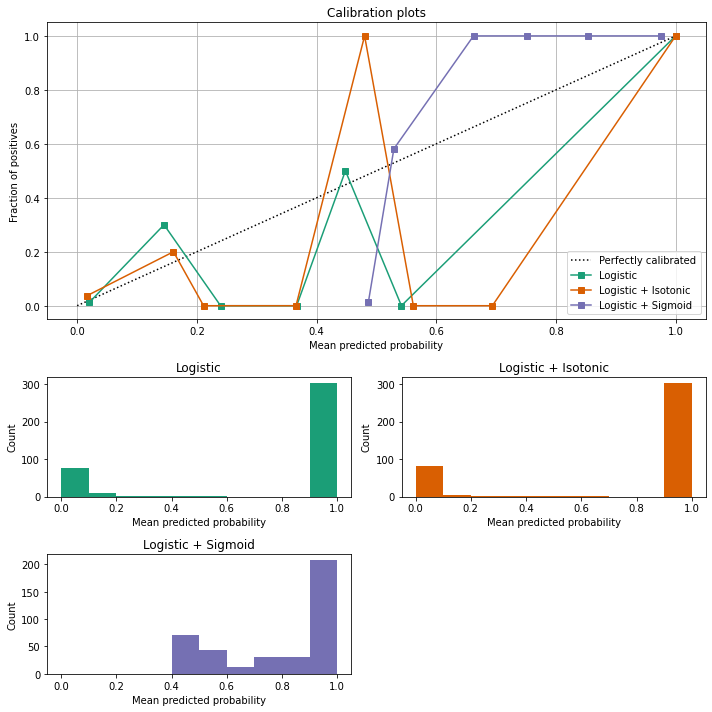

In [95]:
#Se definen funciones para observar las probabilidades calibradas.
clf_list = [
    (modelo_logit_aux, "Logistic"),
    (modelo_logit_isotonica, "Logistic + Isotonic"),
    (modelo_logit_platt, "Logistic + Sigmoid"),
]

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(x_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        x_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

###Que se hizo en la parte 2 

Para predecir la probabilidad de que sea aprobada una tarjeta de crédito según un pull de características se estimaron 3 modelos de clasificación: 
•	Un modelo de regresión logística 
•	Un árbol de decisión 
•	Un bosque aleatorio 
De estos 3 modelos se eligió el mejor modelo predictivo según la métrica del accuracy; entre el modelo de regresión logística y el bosque aleatorio el accuracy es muy similar, sin embargo, se continuo el modelaje del problema con la metodología de regresión logística debido a que estos modelos proveen predicciones mejor calibradas bajo un modelo probabilístico.

A continuación, se estimó el punto óptimo donde se maximmimizan los verdaderos positivos y se minimizan los falsos negativos descritos en la curva ROC, con el objetivo de reclasificar las predicciones hechas por el modelo estándar. 

Luego se estimaron algunas métricas para determinar si el modelo presenta algún tipo de sesgo respecto a algunas variables sensibles, como el sexo y la raza de los solicitantes de tarjetas de crédito. En términos generales se concluye que el modelo presenta un sesgo, al clasificar de forma mas recurrente a las mujeres y las personas de raza negra como no aptos para obtener una tarjeta de crédito. 

Con estos resultados se procede a hacer una calibración de las predicciones mediante los métodos de Platt Scaling y transformación isotónica, las cuales empeoran y mejoran respectivamente las predicciones de los verdaderos negativos, matieniendo las predicciones de los verdaderos positivos constantes, iguales a las del modelo no calibrado.        


***Sesgos en variables protegidas***

Para el platt Scaling.

In [96]:
#Se concatena en una sola base los datos de prueba y las predicciones con el platt scaling.
aux = pd.DataFrame({"y_test": y_test, "y_platt": y_pred_optimo_platt})

#Se combina con los datos de raza y de sexo originales.
Resultados_platt = pd.merge(aux, Creditos_aux[["sex", "race"]], left_index=True, right_index=True)
Resultados_platt.columns = ["score", "label_value", "sex", "race"]

#Se calculan las métricas.
xtab_platt, categories_platt = g.get_crosstabs(Resultados_platt)
xtab_platt

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,309,sex,Female,0.606897,1.0,0.904762,0.0,0.0,...,0.582781,0,57,6,88,145,6,151,396,0.960265
1,0,binary 0/1,309,sex,Male,0.920833,1.0,0.791667,0.0,0.0,...,0.902041,0,19,5,221,240,5,245,396,0.979592
2,0,binary 0/1,309,race,Black,0.570000,1.0,0.877551,0.0,0.0,...,0.537736,0,43,6,57,100,6,106,396,0.943396
3,0,binary 0/1,309,race,Other,0.831858,1.0,0.826087,0.0,0.0,...,0.803419,0,19,4,94,113,4,117,396,0.965812
4,0,binary 0/1,309,race,White,0.918605,1.0,0.933333,0.0,0.0,...,0.913295,0,14,1,158,172,1,173,396,0.994220


<AxesSubplot:title={'center':'PREV (Model 0)'}, xlabel='Absolute Metric Magnitude'>

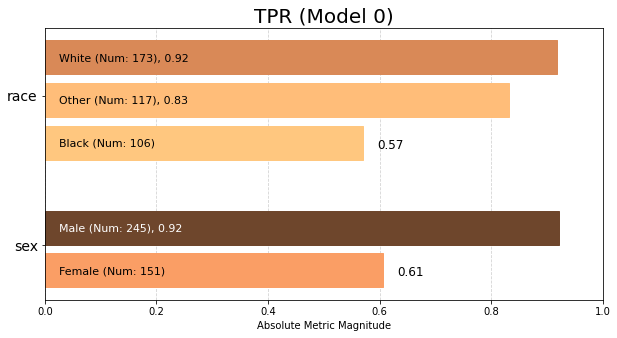

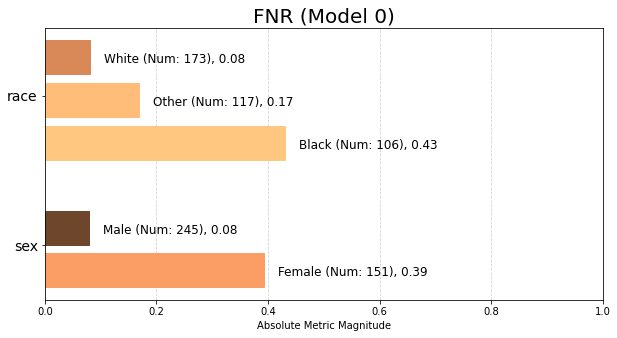

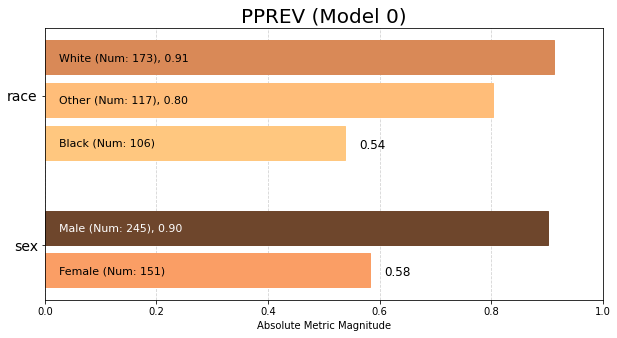

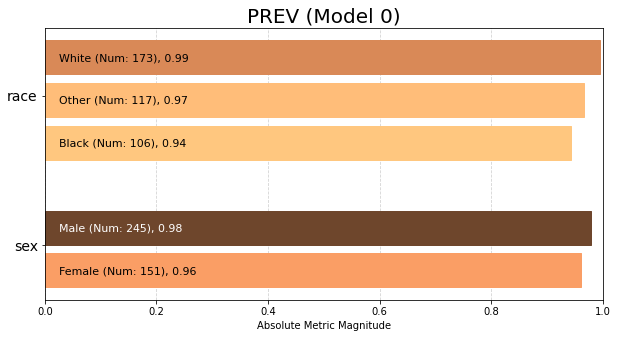

In [97]:
#Se gráfican las métricas de interés.
aqp.plot_group_metric(xtab_platt, 'tpr')
aqp.plot_group_metric(xtab_platt, 'fnr')
aqp.plot_group_metric(xtab_platt, 'pprev')
aqp.plot_group_metric(xtab_platt, 'prev')

Para la transformación isótonica.

In [98]:
#Se concatena en una sola base los datos de prueba y las predicciones con la transformación isotonica.
aux = pd.DataFrame({"y_test": y_test, "y_platt": y_pred_optimo_isotonica})

#Se combina con los datos de raza y de sexo originales.
Resultados_isotonica = pd.merge(aux, Creditos_aux[["sex", "race"]], left_index=True, right_index=True)
Resultados_isotonica.columns = ["score", "label_value", "sex", "race"]

#Se calculan las métricas.
xtab_isotonica, categories_isotonica = g.get_crosstabs(Resultados_isotonica)
xtab_isotonica

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,309,sex,Female,0.785714,1.0,0.380952,0.0,0.0,...,0.582781,0,24,39,88,112,39,151,396,0.741722
1,0,binary 0/1,309,sex,Male,0.944444,1.0,0.541667,0.0,0.0,...,0.902041,0,13,11,221,234,11,245,396,0.955102
2,0,binary 0/1,309,race,Black,0.780822,1.0,0.326531,0.0,0.0,...,0.537736,0,16,33,57,73,33,106,396,0.688679
3,0,binary 0/1,309,race,Other,0.912621,1.0,0.391304,0.0,0.0,...,0.803419,0,9,14,94,103,14,117,396,0.880342
4,0,binary 0/1,309,race,White,0.929412,1.0,0.800000,0.0,0.0,...,0.913295,0,12,3,158,170,3,173,396,0.982659


<AxesSubplot:title={'center':'PREV (Model 0)'}, xlabel='Absolute Metric Magnitude'>

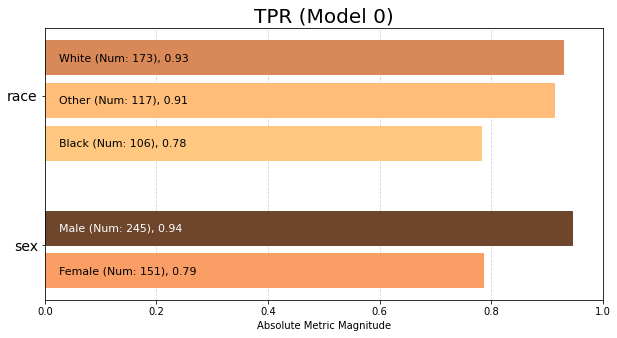

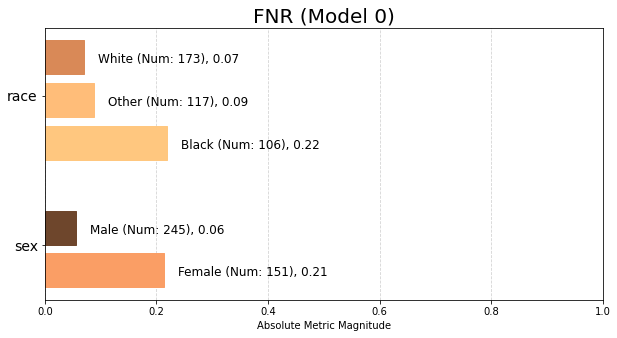

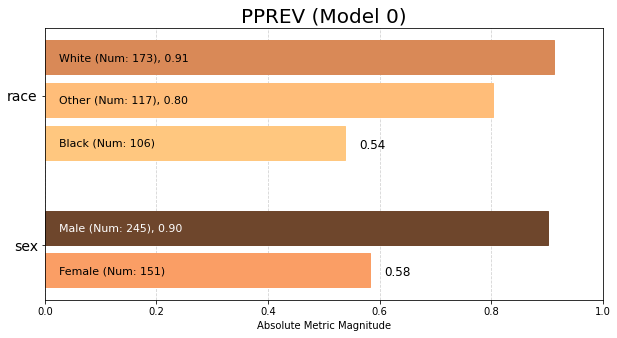

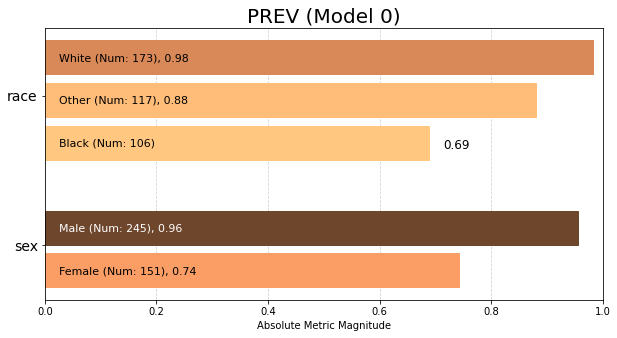

In [99]:
#Se gráfican las métricas de interés.
aqp.plot_group_metric(xtab_isotonica, 'tpr')
aqp.plot_group_metric(xtab_isotonica, 'fnr')
aqp.plot_group_metric(xtab_isotonica, 'pprev')
aqp.plot_group_metric(xtab_isotonica, 'prev')

Se grafican disparidades entre el modelo logit sin calibrar y por ambos métodos de calibración.

$$Disparity_{FNR} =  \frac{FNR_{black}}{FNR_{white}}$$ 

Primero el Plat Scalling.

Nota: score se referirá a las predicciones antes de calibrar, label_value serán las predicciones al calibrar.

In [100]:
#Se concatena en una sola base las predicciones antes de calibrar y con el platt scaling.
Original_con_platt = pd.merge(Resultados[["label_value"]], 
                              Resultados_platt[["label_value", "sex", "race"]], 
                              left_index=True, right_index=True)

#Se cambia el nombre de las variables.
Original_con_platt.columns = ["score", "label_value", "sex", "race"]

#Se calculan las métricas.
xtab_platt, categories_platt = g.get_crosstabs(Original_con_platt)

#Se calculan las disparidades de las métricas con respecto al grupo de referencia.
b = Bias()
bdf_platt = b.get_disparity_predefined_groups(xtab_platt, original_df= Original_con_platt, 
                                        ref_groups_dict={"sex": "Male", "race": "White"})

get_disparity_predefined_group()


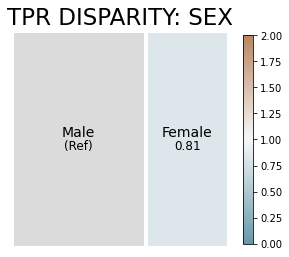

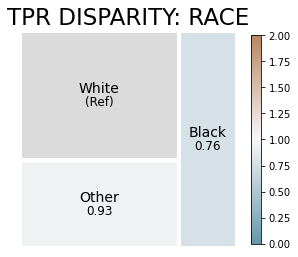

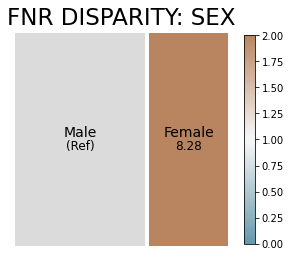

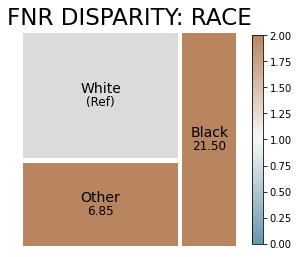

In [101]:
#Se visualizan las disparidades.
tpr_disparidad_sexo = aqp.plot_disparity(bdf_platt, group_metric= "tpr_disparity",
                                    attribute_name= "sex")
tpr_disparidad_raza = aqp.plot_disparity(bdf_platt, group_metric= "tpr_disparity",
                                    attribute_name= "race")
fnr_disparidad_sexo = aqp.plot_disparity(bdf_platt, group_metric= "fnr_disparity",
                                    attribute_name= "sex")
fnr_disparidad_raza = aqp.plot_disparity(bdf_platt, group_metric= "fnr_disparity",
                                    attribute_name= "race")

Ahora con transformación isotonica

In [102]:
#Se concatena en una sola base las predicciones antes de calibrar y con el platt scaling.
Original_con_isotonica = pd.merge(Resultados[["label_value"]], 
                              Resultados_isotonica[["label_value", "sex", "race"]], 
                              left_index=True, right_index=True)

#Se cambia el nombre de las variables.
Original_con_isotonica.columns = ["score", "label_value", "sex", "race"]

#Se calculan las métricas.
xtab_isotonica, categories_isotonica = g.get_crosstabs(Original_con_isotonica)

#Se calculan las disparidades de las métricas con respecto al grupo de referencia.
bdf_isotonica = b.get_disparity_predefined_groups(xtab_isotonica, original_df= Original_con_isotonica, 
                                        ref_groups_dict={"sex": "Male", "race": "White"})

get_disparity_predefined_group()


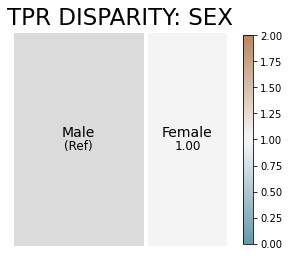

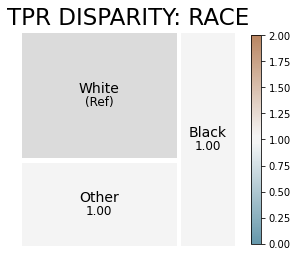

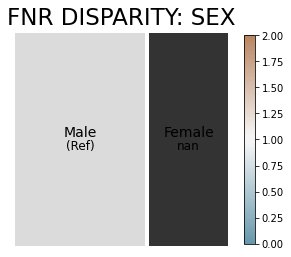

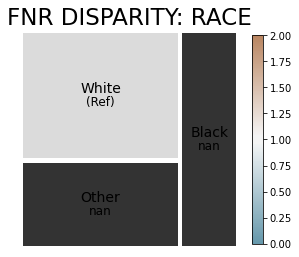

In [103]:
#Se visualizan las disparidades.
tpr_disparidad_sexo = aqp.plot_disparity(bdf_isotonica, group_metric= "tpr_disparity",
                                    attribute_name= "sex")
tpr_disparidad_raza = aqp.plot_disparity(bdf_isotonica, group_metric= "tpr_disparity",
                                    attribute_name= "race")
fnr_disparidad_sexo = aqp.plot_disparity(bdf_isotonica, group_metric= "fnr_disparity",
                                    attribute_name= "sex")
fnr_disparidad_raza = aqp.plot_disparity(bdf_isotonica, group_metric= "fnr_disparity",
                                    attribute_name= "race")